In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,NaN,118.0,NaN,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,NaN,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,NaN,0.43,1.35,10.20,NaN,1.56,835.0
176,13.17,2.59,2.37,20.0,NaN,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	15
float64		column 2	7
float64		column 3	14
float64		column 4	22
float64		column 5	21
float64		column 6	7
float64		column 7	14
float64		column 8	15
float64		column 9	21
float64		column 10	22
float64		column 11	22
float64		column 12	22
float64		column 13	14


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,163.000000,171.000000,164.000000,156.000000,157.000000,171.000000,164.000000,163.000000,157.000000,156.000000,156.000000,156.000000,164.000000
mean,13.018282,2.313684,2.361098,19.474359,98.159236,2.287602,2.057256,0.359080,1.602357,5.133269,0.956513,2.575962,748.512195
std,0.791918,1.084936,0.273984,3.145050,12.138891,0.623911,0.984088,0.120107,0.524061,2.313868,0.213848,0.693622,309.683878
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.470000,0.130000,0.550000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.610000,2.210000,17.425000,88.000000,1.745000,1.250000,0.270000,1.260000,3.337500,0.807500,1.927500,510.000000
50%,13.050000,1.860000,2.360000,19.500000,97.000000,2.320000,2.155000,0.340000,1.550000,4.800000,0.975000,2.770000,675.000000
75%,13.655000,3.030000,2.532500,21.500000,106.000000,2.800000,2.865000,0.430000,1.920000,6.200000,1.102500,3.130000,973.750000
max,14.830000,5.800000,3.230000,28.500000,139.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

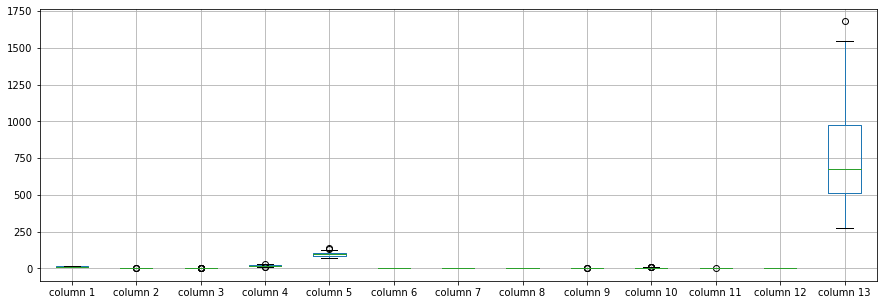

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.018282
column 2       2.313684
column 3       2.361098
column 4      19.474359
column 5      98.159236
column 6       2.287602
column 7       2.057256
column 8       0.359080
column 9       1.602357
column 10      5.133269
column 11      0.956513
column 12      2.575962
column 13    748.512195
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.089428,0.262971,-0.294170,0.333112,0.288575,0.315164,-0.110233,0.170730,0.479028,-0.071873,0.145295,0.641383
column 2,0.089428,1.000000,0.142522,0.262862,-0.045299,-0.354407,-0.396403,0.312449,-0.281319,0.205358,-0.567394,-0.438762,-0.154166
column 3,0.262971,0.142522,1.000000,0.415039,0.435463,0.131105,0.139763,0.201712,-0.033443,0.228208,-0.105379,-0.071961,0.242935
column 4,-0.294170,0.262862,0.415039,1.000000,-0.148871,-0.354911,-0.393763,0.407698,-0.219600,-0.026535,-0.270768,-0.376696,-0.405171
column 5,0.333112,-0.045299,0.435463,-0.148871,1.000000,0.303144,0.321299,-0.197540,0.170881,0.222534,0.108661,0.130187,0.473016
column 6,0.288575,-0.354407,0.131105,-0.354911,0.303144,1.000000,0.852161,-0.445933,0.628299,-0.065492,0.427510,0.705124,0.492106
column 7,0.315164,-0.396403,0.139763,-0.393763,0.321299,0.852161,1.000000,-0.522754,0.622742,-0.180783,0.535946,0.773569,0.512306
column 8,-0.110233,0.312449,0.201712,0.407698,-0.197540,-0.445933,-0.522754,1.000000,-0.368135,0.186186,-0.336814,-0.551467,-0.265567
column 9,0.170730,-0.281319,-0.033443,-0.219600,0.170881,0.628299,0.622742,-0.368135,1.000000,-0.020206,0.302034,0.478066,0.343619
column 10,0.479028,0.205358,0.228208,-0.026535,0.222534,-0.065492,-0.180783,0.186186,-0.020206,1.000000,-0.543889,-0.421696,0.279337


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+41,13+41+41,13+41+41,13+41+41+41+41,13+41+41+41+41+41,13+41+41+41+41+41+41,13+41+41+41+41+41,13+41+41+41+41,13+41+41+41,13+41+41,13+41,13], vae_layer = False, seed = 410)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 870.9276677911931
Epoch: 1 , loss: 881.5286920720881
Epoch: 2 , loss: 871.6819901899858
Epoch: 3 , loss: 874.1207663796165
Epoch: 4 , loss: 877.5418701171875
Epoch: 5 , loss: 877.3383345170455
Epoch: 6 , loss: 872.8050592595881
Epoch: 7 , loss: 879.551347212358
Epoch: 8 , loss: 884.828896262429
Epoch: 9 , loss: 875.157548384233
Epoch: 10 , loss: 870.279951615767
Epoch: 11 , loss: 878.3517955433239
Epoch: 12 , loss: 874.3717817826705
Epoch: 13 , loss: 875.0723544034091
Epoch: 14 , loss: 874.4810569069602
Epoch: 15 , loss: 880.7363503196023
Epoch: 16 , loss: 875.695029518821
Epoch: 17 , loss: 880.8243796608665
Epoch: 18 , loss: 871.0535833185369
Epoch: 19 , loss: 872.054970481179
Epoch: 20 , loss: 875.8270874023438
Epoch: 21 , loss: 874.1668035333806
Epoch: 22 , loss: 879.6451637961648
Epoch: 23 , loss: 875.8865633877841
Epoch: 24 , loss: 883.7841242009944
Epoch: 25 , loss: 876.3925836736506
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.930000
column 2       3.800000
column 3       2.650000
column 4      18.600000
column 5     102.000000
column 6       2.410000
column 7       2.410000
column 8       0.250000
column 9       1.980000
column 10      4.500000
column 11      1.030000
column 12      2.743828
column 13    770.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,-6.600953,0.000000,-1.347306,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,-3.670623,0.000000,0.0,0.0
174,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0
175,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.11881,0.0,0.0,0.000000,0.654021,0.0,0.0
176,0.0,0.0,0.0,0.000000,-47.063065,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2288.0946954617893, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.2099539651718018

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.600000,127.000000,2.800000,3.06000,0.28,2.29,5.640000,1.040000,3.92,1065.0
1,13.20,1.78,2.14,11.200000,100.000000,2.650000,2.76000,0.26,1.28,4.380000,1.050000,3.40,1050.0
2,13.16,2.36,2.67,18.600000,101.000000,2.800000,3.24000,0.30,2.81,5.680000,1.030000,3.17,1185.0
3,14.37,1.95,2.50,16.800000,113.000000,3.850000,3.49000,0.24,2.18,7.800000,0.860000,3.45,1480.0
4,13.24,2.59,2.87,14.399047,118.000000,1.452694,2.69000,0.39,1.82,4.320000,1.040000,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.500000,95.000000,1.680000,0.61000,0.52,1.06,4.029377,0.640000,1.74,740.0
174,13.40,3.91,2.48,23.000000,102.000000,1.800000,0.75000,0.43,1.41,7.300000,0.700000,1.56,750.0
175,13.27,4.28,2.26,20.000000,120.000000,1.590000,2.80881,0.43,1.35,10.200000,1.244021,1.56,835.0
176,13.17,2.59,2.37,20.000000,72.936935,1.650000,0.68000,0.53,1.46,9.300000,0.600000,1.62,840.0


In [20]:
imputations[-1].to_excel("Wine_NL_10(imp).xlsx", index=False, header=False)